In [8]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import 
import numpy as np
from implementations import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [3]:
from proj1_helpers import load_csv_data 

# load 
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# Handle outliers

In [4]:
from outliers import handle_outliers

# outliers
X, y = handle_outliers(input_data_raw, y_raw, -999, True)

# Standardize

In [48]:
from standard import standardize

X, mean_x, std_x = standardize(X)

# Feature names and index

In [49]:
# names of the features 
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]

for ind, name in enumerate(featureNames):
    print(name, '( index:', ind, ')')

DER_mass_MMC ( index: 0 )
DER_mass_transverse_met_lep ( index: 1 )
DER_mass_vis ( index: 2 )
DER_pt_h ( index: 3 )
DER_deltaeta_jet_jet ( index: 4 )
DER_mass_jet_jet ( index: 5 )
DER_prodeta_jet_jet ( index: 6 )
DER_deltar_tau_lep ( index: 7 )
DER_pt_tot ( index: 8 )
DER_sum_pt ( index: 9 )
DER_pt_ratio_lep_tau ( index: 10 )
DER_met_phi_centrality ( index: 11 )
DER_lep_eta_centrality ( index: 12 )
PRI_tau_pt ( index: 13 )
PRI_tau_eta ( index: 14 )
PRI_tau_phi ( index: 15 )
PRI_lep_pt ( index: 16 )
PRI_lep_eta ( index: 17 )
PRI_lep_phi ( index: 18 )
PRI_met ( index: 19 )
PRI_met_phi ( index: 20 )
PRI_met_sumet ( index: 21 )
PRI_jet_num ( index: 22 )
PRI_jet_leading_pt ( index: 23 )
PRI_jet_leading_eta ( index: 24 )
PRI_jet_leading_phi ( index: 25 )
PRI_jet_subleading_pt ( index: 26 )
PRI_jet_subleading_eta ( index: 27 )
PRI_jet_subleading_phi ( index: 28 )
PRI_jet_all_pt ( index: 29 )


# Split data into training and testing sets

In [50]:
from split_data import split_data

# ratio (training)
ratio = 0.8
seed = 1

# split
X_tr, y_tr, X_te, y_te = split_data(X, y, ratio, seed)

print('training samples:', X_tr.shape[0])
print('testing samples:', X_te.shape[0])

training samples: 54491
testing samples: 13623


# Least squares Gradient descent

Gradient Descent(1999/1999): loss MSE=0.40339915974453644, w0=-0.4850922512943504, w1=0.3941223060194452


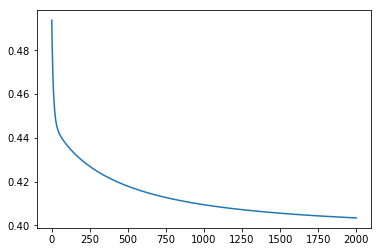

In [63]:
import matplotlib.pyplot as plt

# choose features
ind_features = [1, 13, 6, 11, 7, 2, 16, 10, 12, 21, 19, 5, 9, 23, 0, 26, 3, 22, 4, 18, 28]

# initialize weights
initial_w = np.zeros(len(ind_features))

# number of iterations
max_iters = 2000

# step for the GD
gamma = 1e-2

# least squares GD
w_ls_all, loss_ls_all = least_squares_GD(y_tr, X_tr[:,ind_features], initial_w, max_iters, gamma)

# take last weights
w_ls = w_ls_all[-1]

# plot losses
plt.figure()
plt.plot(range(max_iters), loss_ls_all)
plt.show()

# Testing

In [64]:
from proj1_helpers import predict_labels

# predict
y_pred = predict_labels(w_ls, X_te[:,ind_features])

# class error
class_error = len(np.argwhere(y_te-y_pred))/len(y_te)*100

print("labels: ", y.shape[0])
print("classification error: ", class_error)

labels:  68114
classification error:  30.756808338838727
